In [1]:
import os
import copy
import time 
import pymannkendall as mk
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, time, datetime
import plotly.express as px
import plotly.graph_objs as go

In [2]:
dfRelDes= pd.read_csv('BD/Rel_Desembarque_2005_2020_Ampliado_CPUE_coordenadasPequeiros.csv')
print(dfRelDes.shape)
print(dfRelDes.columns)


/tmp/ipykernel_3477/4176787427.py:1: DtypeWarning: Columns (20,42,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  dfRelDes= pd.read_csv('BD/Rel_Desembarque_2005_2020_Ampliado_CPUE_coordenadasPequeiros.csv')


(809396, 65)
Index(['Unnamed: 0.1', 'Altura Malha', 'Ano', 'Arte', 'Atravessador',
       'CPUE kg/dia', 'Captura(kg)', 'Combustível(R$)', 'Comp. Rede',
       'Comunidade', 'Consumo', 'CoordX', 'CoordY', 'Data Chegada',
       'Data Registro', 'Data Saída', 'Dias Não Despesca Camboa', 'Embarcação',
       'Entrevistado', 'Espécie', 'Espécie Alvo', 'Gêlo(R$)', 'Hora Chegada',
       'Hora Saída', 'Houve Captura', 'ID', 'Isca', 'Isca(R$)', 'KgTotal',
       'Litros Combust.', 'Mês', 'Núm. Anzóis', 'Núm. Armadilhas',
       'Núm. Bocas Armadilha', 'Núm. Linhas', 'Núm. Pescadores',
       'Núm. Pescadores Participaram', 'Observação', 'Peixaria,Mercado',
       'Pesqueiro', 'Porto Desembarque', 'Profund. Lance',
       'Proprietário Camboa', 'Quant. Dias Pescou Mês', 'Quant. Morredores',
       'Quantas Camboas', 'R$Total', 'Rancho(R$)', 'SubArte', 'TI',
       'Tamanho Anzol', 'Tamanho Armadilhas', 'Tamanho Malha', 'Tipo Embarc.',
       'Tipo IBAMA', 'Unnamed: 0', 'Utiliza Guincho', 'Val

In [3]:
# dfRelDes.to_excel('BD/Rel_Desembarque_2005_2020_Ampliado_CPUE_coordenadasPequeiros.xlsx')

In [4]:
dfRelDes.head()

,Unnamed: 0.1,Altura Malha,Ano,Arte,Atravessador,CPUE kg/dia,Captura(kg),Combustível(R$),Comp. Rede,Comunidade,...,Unnamed: 0,Utiliza Guincho,Valor/Kg(R$),Valoração,Venda Direta,corresponde,dist_gas,dist_plat,entre_05_5KM,menor_500M
0,0,NaN,2005.0,ARMADILHA,False,17.0,17.0,0.0,0.0,Salinas da Margarida,...,0,False,1.0,4.250,False,True,1.5,78.16,NaN,NaN
1,1,NaN,2005.0,ARMADILHA,False,45.0,45.0,0.0,0.0,Cabuçu,...,1,False,1.5,16.875,False,True,NaN,NaN,NaN,NaN
2,2,NaN,2005.0,ARMADILHA,False,50.0,50.0,0.0,0.0,Cabuçu,...,2,False,1.5,18.750,False,True,1.5,78.16,NaN,NaN
3,3,NaN,2005.0,ARMADILHA,False,12.0,12.0,0.0,0.0,Cabuçu,...,3,False,1.5,4.500,False,True,1.5,78.16,NaN,NaN
4,4,NaN,2005.0,ARMADILHA,False,95.0,95.0,0.0,0.0,Cabuçu,...,4,False,1.5,35.625,False,True,NaN,NaN,NaN,NaN


In [5]:
tamfilas = dfRelDes.shape[0]
tamfilas

809396

In [6]:
dfRelDes['dist_gas'].isna().sum()

693086

In [7]:
noNAnDist = dfRelDes['dist_plat'].isna().sum()
noNAnDist

693086

In [11]:
dfDadosDist = dfRelDes.loc[pd.notnull(dfRelDes.dist_gas)]

In [14]:
dfDadosDist.dist_gas.isna().sum()

0

In [17]:
dfDadosDist.shape

(116310, 66)

In [17]:
invalid = dfDadosDist[dfDadosDist.dist_gas == '-'].shape[0]
invalid

25342

In [22]:
dfDadosDist = dfDadosDist[dfDadosDist.dist_gas != '-']

In [23]:
dfDadosDist.shape

(90968, 66)

In [18]:
dictDist = {
    'gasoduto': ['com_dist', 'sin_dist'],
    'counts': [tamfilas - noNAnDist - invalid, noNAnDist]
}
dfDist = pd.DataFrame.from_dict(dictDist)
dfDist

,gasoduto,counts
0,com_dist,90968
1,sin_dist,693086


([<matplotlib.patches.Wedge at 0x7f788b978d90>,
 [Text(1.027733968687949, 0.39212611441335804, 'com_dist'),
  Text(-1.0744491778695722, -0.4099499532569811, 'sin_dist')],
 [Text(0.5605821647388812, 0.21388697149819527, '11.6%'),
  Text(-0.6072973614045406, -0.23171084314525014, '88.4%')])

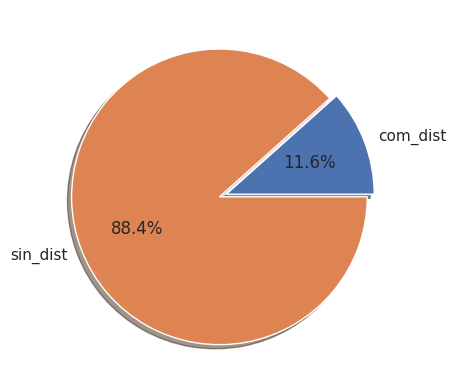

In [19]:
plt.pie(dfDist.counts, labels=dfDist.gasoduto ,  
        autopct='%1.1f%%', #colors=colors,
#         autopct= lambda p: '{} / {:.0f}%'.format(p, p * tamfilas / 100),
        shadow=True, explode=[0, 0.05])


In [21]:
fig = px.bar(dfDist, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [24]:
dfDadosDist.dist_gas = dfDadosDist.dist_gas.apply(lambda X: float(X))

In [25]:
def distancia_plataforma_menor_500metros(dist):
    try:
        if float(dist) < 0.5:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['m<_500M'] = dfDadosDist['dist_gas'].apply(lambda x: distancia_plataforma_menor_500metros(x))

##### Comprovando o filtro 

In [28]:
dfDadosDist[dfDadosDist['dist_gas'] < 0.5][['dist_gas','m<_500M']].head()

,dist_gas,m<_500M
152725,0.44,True
152726,0.44,True
154073,0.44,True
154074,0.44,True
154772,0.14,True


In [29]:
dfDadosDist[dfDadosDist['dist_gas'] > 0.5][['dist_gas','m<_500M']].head()

,dist_gas,m<_500M
0,1.50,False
2,1.50,False
3,1.50,False
8,1.50,False
11,3.54,False


In [30]:
dadosDist05Km = dfDadosDist[dfDadosDist['m<_500M'] == True].shape[0]
dadosDist05Km

2239

In [31]:
dictDist500M = {
    'gasoduto': ['< 500m', 'Maior 500M'],
    'counts': [dadosDist05Km, dfDadosDist.shape[0] - dadosDist05Km]
}
dfDist500m = pd.DataFrame.from_dict(dictDist500M)
dfDist500m

,gasoduto,counts
0,< 500m,2239
1,Maior 500M,88729


([<matplotlib.patches.Wedge at 0x7f788a5161a0>,
 [Text(1.0967131723635357, 0.08497186336847108, '< 500m'),
  Text(-1.1465637633098968, -0.0888343214340425, 'Maior 500M')],
 [Text(0.5982071849255648, 0.04634828911007513, '2.5%'),
  Text(-0.6480577792621156, -0.0502107034192414, '97.5%')])

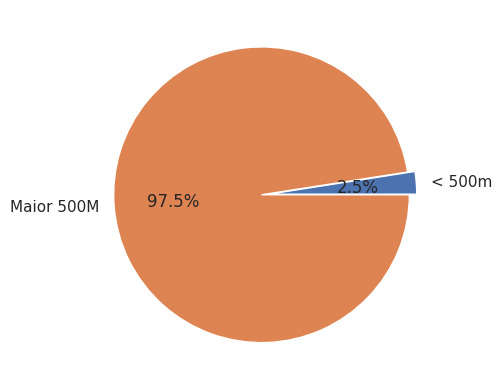

In [32]:
plt.pie(dfDist500m.counts, labels=dfDist500m.gasoduto ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [33]:
fig = px.bar(dfDist500m, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [34]:
dfDadosDist[dfDadosDist['menor_500M'] == True]['SubArte'].unique()

array(['ABALO', 'REÇA', 'EMALHE', 'GROSEIRA', 'LINHA DE MÃO', 'MERGULHO',
       'SUPERFÍCIE BOIADA', 'ESPINHEL', 'ARRAEIRA', 'FUNDO PEIXE'],
      dtype=object)

## analises distancias entre 500 metros e 5 km

In [44]:
dfDadosDist.shape

(90968, 66)

In [45]:
def distancia_plataforma_5KM(dist):
    try:
        if dist < 5 and dist >= 0.5:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_05_5KM'] = dfDadosDist['dist_gas'].apply(distancia_plataforma_5KM)

In [46]:
dfDadosDist[['entre_05_5KM', 'dist_gas']].head(10)

,entre_05_5KM,dist_gas
0,True,1.50
2,True,1.50
3,True,1.50
8,True,1.50
11,True,3.54
12,True,1.50
17,True,1.41
24,True,1.41
28,True,3.54
31,True,3.41


### Comprovando o resultado 

In [49]:
dfDadosDist[dfDadosDist['dist_gas'] > 5][['dist_gas','entre_05_5KM']].head()

,dist_gas,entre_05_5KM
8582,18.41,False
8586,18.41,False
8587,18.41,False
9759,18.41,False
9793,18.41,False


In [50]:
noDist0_5and5KM = dfDadosDist[dfDadosDist['entre_05_5KM'] == True].shape[0]
noDist0_5and5KM

79676

In [51]:
dictDist_0a5KM = {
    'gasoduto': ['0.5-5KM', 'Maior 5KM'],
    'counts': [noDist0_5and5KM, dfDadosDist.shape[0] - noDist0_5and5KM]
}
dfDist_0a5KM = pd.DataFrame.from_dict(dictDist_0a5KM)
dfDist_0a5KM

,gasoduto,counts
0,0.5-5KM,79676
1,Maior 5KM,11292


([<matplotlib.patches.Wedge at 0x7f788b816e00>,
 [Text(-1.0174121778985512, 0.4181775463409375, '0.5-5KM'),
  Text(1.0636581859848493, -0.43718561662916156, 'Maior 5KM')],
 [Text(-0.5549520970355734, 0.22809684345869313, '87.6%'),
  Text(0.6011981051218711, -0.24710491374691734, '12.4%')])

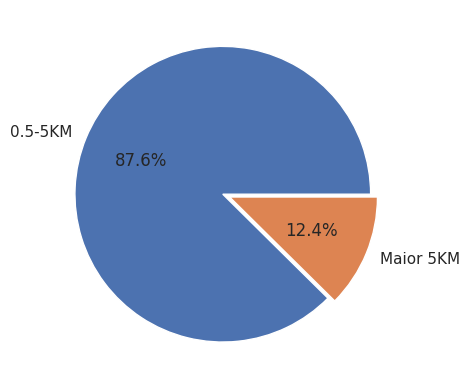

In [52]:
plt.pie(dfDist_0a5KM.counts, labels=dfDist_0a5KM.gasoduto ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [53]:
fig = px.bar(dfDist_0a5KM, 
             x='gasoduto', 
             y='counts',
             color='gasoduto',
             text_auto='gasoduto',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [54]:
dfDadosDist[dfDadosDist['entre_05_5KM'] == True]['SubArte'].unique()

array(['GAIOLA', 'MANZUÁ', 'JERERÉ', 'ARRASTO DE FUNDO OU BALOEIRO',
       'CALÃO', 'REDINHA', 'CERCO', 'ABALO', 'PESQUEIRO', 'Não Informado',
       'EMALHE', 'REÇA', 'ARRAEIRA', 'TAINHEIRA', 'PARUZEIRA', 'GROSEIRA',
       'LINHA DE MÃO', 'MARISCAGEM', 'MERGULHO', 'TARRAFA',
       'SUPERFÍCIE BOIADA', 'FUNDO PEIXE', 'FUNDO CAMARÃO', 'ESPINHEL'],
      dtype=object)

# analises a plataforma 


In [87]:
dfDadosDistP = dfRelDes.loc[pd.notnull(dfRelDes.dist_plat)]
dfDadosDistP.shape

(116310, 65)

In [106]:
dfDadosDistP = copy.deepcopy(dfDadosDistP)

In [107]:
invalid = dfDadosDistP[dfDadosDistP.dist_plat == '-'].shape[0]
invalid

0

In [108]:
dfDadosDistP.dist_plat.unique()

array([78.16, 78.42, 75.48, 73.77, 71.29, 69.84, 79.19, 72.07, 90.33,
       73.22, 87.77, 70.9 , 74.13, 72.02, 28.83,  8.38, 10.81, 20.25,
       27.15, 28.69, 28.91, 31.65, 33.29, 12.59,  7.78,  1.81, 26.55,
        8.85, 78.9 , 77.23,  8.88, 12.18, 13.01, 88.82,  6.19, 25.4 ,
       10.89, 40.26, 13.87, 16.77, 15.69,  8.43, 22.1 ,  9.82, 14.44,
       15.  , 79.99,  5.42, 83.36, 28.24, 74.17, 88.75, 23.5 , 24.09,
       22.8 ,  4.64, 31.25, 10.23])

In [109]:
dfDadosDistP.dist_plat.sort_values()

568301     1.81
285362     1.81
765729     1.81
765730     1.81
765731     1.81
          ...  
159520    90.33
159589    90.33
159590    90.33
160997    90.33
167217    90.33
Name: dist_plat, Length: 116310, dtype: float64

In [110]:
dfDadosDistP.loc[0]

Unnamed: 0.1               0
Altura Malha             NaN
Ano                   2005.0
Arte               ARMADILHA
Atravessador           False
                     ...    
dist_plat              78.16
entre_05_5KM             NaN
menor_500M               NaN
dist_05_5KM_Pla        False
dist_platF             78.16
Name: 0, Length: 67, dtype: object

In [111]:
dfDadosDistP.loc[:,'dist_plat'] = dfDadosDistP.loc[:,'dist_plat'].astype(float)

In [112]:
def distancia_plataforma_5KMV(dist):
    
    if dist < 5 and dist >= 0.5:
        return True
    else:
        return False    


dfDadosDistP['dist_05_5KM_Pla'] = dfDadosDistP['dist_plat'].apply(lambda x: distancia_plataforma_5KMV(float(x)))

In [118]:
noDist0_5and5KMPla = dfDadosDistP[dfDadosDistP['dist_05_5KM_Pla'] == True].shape[0]
noDist0_5and5KMPla

3930

### Comprovançao 

In [119]:
dfDadosDistP[dfDadosDistP['dist_plat'] < 5][['dist_plat', 'dist_05_5KM_Pla']].head()

,dist_plat,dist_05_5KM_Pla
99473,1.81,True
112674,1.81,True
180078,1.81,True
180079,1.81,True
180097,1.81,True


In [120]:
dfDadosDistP[dfDadosDistP['dist_plat'] > 5][['dist_plat', 'dist_05_5KM_Pla']].head()

,dist_plat,dist_05_5KM_Pla
0,78.16,False
2,78.16,False
3,78.16,False
8,78.16,False
11,78.42,False


In [121]:
dfDadosDistP.shape[0] - noDist0_5and5KMPla

112380

In [122]:

dictDist_0a5KM = {
    'plataforma': ['0.5-5KM', 'Maior 5KM'],
    'counts': [noDist0_5and5KMPla, dfDadosDistP.shape[0] - noDist0_5and5KMPla]
}


In [123]:
dfDist_0a5KMP = pd.DataFrame.from_dict(dictDist_0a5KM)
dfDist_0a5KMP

,plataforma,counts
0,0.5-5KM,3930
1,Maior 5KM,112380


([<matplotlib.patches.Wedge at 0x7f78899b2ef0>,
 [Text(1.093808361508202, 0.11654727922496969, '0.5-5KM'),
  Text(-1.1435269333768832, -0.12184478914447613, 'Maior 5KM')],
 [Text(0.5966227426408374, 0.06357124321361983, '3.4%'),
  Text(-0.6463413101695425, -0.06886879386426911, '96.6%')])

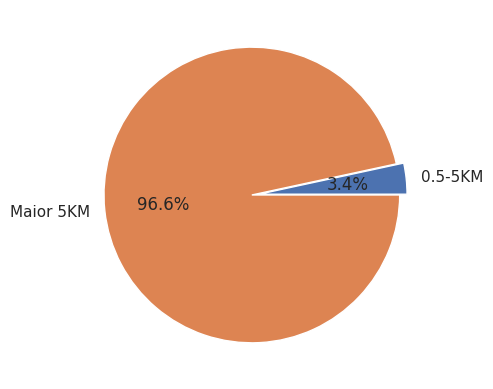

In [124]:
plt.pie(dfDist_0a5KMP.counts, labels=dfDist_0a5KMP.plataforma ,  
        autopct='%1.1f%%', explode=[0, 0.05])

In [125]:
fig = px.bar(dfDist_0a5KMP, 
             x='plataforma', 
             y='counts',
             color='plataforma',
             text_auto='Plataforma',
             height=400,
            width= 500)
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False)
fig.show()

In [127]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 2 and dist >= 1:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_1_2KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [128]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 3 and dist >= 2:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_2_3KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [129]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 4 and dist >= 3:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_3_4KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [130]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 1 and dist >= 0.5:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_05_1KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [131]:
def distancia_intervalo_GasodutoKM(dist):
    try:
        if dist < 5 and dist >= 4:
            return True
        else:
            return False
    except:
        return np.nan
    
dfDadosDist['entre_4_5KM'] = dfDadosDist['dist_gas'].apply(distancia_intervalo_GasodutoKM)

In [132]:
dfDadosDist.columns

Index(['Unnamed: 0.1', 'Altura Malha', 'Ano', 'Arte', 'Atravessador',
       'CPUE kg/dia', 'Captura(kg)', 'Combustível(R$)', 'Comp. Rede',
       'Comunidade', 'Consumo', 'CoordX', 'CoordY', 'Data Chegada',
       'Data Registro', 'Data Saída', 'Dias Não Despesca Camboa', 'Embarcação',
       'Entrevistado', 'Espécie', 'Espécie Alvo', 'Gêlo(R$)', 'Hora Chegada',
       'Hora Saída', 'Houve Captura', 'ID', 'Isca', 'Isca(R$)', 'KgTotal',
       'Litros Combust.', 'Mês', 'Núm. Anzóis', 'Núm. Armadilhas',
       'Núm. Bocas Armadilha', 'Núm. Linhas', 'Núm. Pescadores',
       'Núm. Pescadores Participaram', 'Observação', 'Peixaria,Mercado',
       'Pesqueiro', 'Porto Desembarque', 'Profund. Lance',
       'Proprietário Camboa', 'Quant. Dias Pescou Mês', 'Quant. Morredores',
       'Quantas Camboas', 'R$Total', 'Rancho(R$)', 'SubArte', 'TI',
       'Tamanho Anzol', 'Tamanho Armadilhas', 'Tamanho Malha', 'Tipo Embarc.',
       'Tipo IBAMA', 'Unnamed: 0', 'Utiliza Guincho', 'Valor/Kg(R$)',
 

In [85]:
listDist = ['entre_05_1KM','entre_1_2KM','entre_2_3KM','entre_3_4KM','entre_4_5KM']
dfDadosDist[listDist].head(8)

,entre_05_1KM,entre_1_2KM,entre_2_3KM,entre_3_4KM,entre_4_5KM
0,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
8,False,True,False,False,False
11,False,False,False,True,False
12,False,True,False,False,False
17,False,True,False,False,False
24,False,True,False,False,False


In [133]:
dfDadosDist.to_csv('BD/Dados_distGasoduto_CPUE_coordPequeirosValidado.csv')

In [134]:
dfDadosDist.to_excel('BD/Dados_distGasoduto_CPUE_coordPequeirosValidado.xlsx')

## salvando os dados para distancia a Paltaforma 

In [135]:
dfDadosDistP.columns

Index(['Unnamed: 0.1', 'Altura Malha', 'Ano', 'Arte', 'Atravessador',
       'CPUE kg/dia', 'Captura(kg)', 'Combustível(R$)', 'Comp. Rede',
       'Comunidade', 'Consumo', 'CoordX', 'CoordY', 'Data Chegada',
       'Data Registro', 'Data Saída', 'Dias Não Despesca Camboa', 'Embarcação',
       'Entrevistado', 'Espécie', 'Espécie Alvo', 'Gêlo(R$)', 'Hora Chegada',
       'Hora Saída', 'Houve Captura', 'ID', 'Isca', 'Isca(R$)', 'KgTotal',
       'Litros Combust.', 'Mês', 'Núm. Anzóis', 'Núm. Armadilhas',
       'Núm. Bocas Armadilha', 'Núm. Linhas', 'Núm. Pescadores',
       'Núm. Pescadores Participaram', 'Observação', 'Peixaria,Mercado',
       'Pesqueiro', 'Porto Desembarque', 'Profund. Lance',
       'Proprietário Camboa', 'Quant. Dias Pescou Mês', 'Quant. Morredores',
       'Quantas Camboas', 'R$Total', 'Rancho(R$)', 'SubArte', 'TI',
       'Tamanho Anzol', 'Tamanho Armadilhas', 'Tamanho Malha', 'Tipo Embarc.',
       'Tipo IBAMA', 'Unnamed: 0', 'Utiliza Guincho', 'Valor/Kg(R$)',
 

In [144]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_PlataformaKM(dist):
    
    if dist < 1 and dist >= 0.5:
        return True
    else:
        return False
        
dfDadosDistP['dist_05_1KM_Pla'] = dfDadosDistP['dist_plat'].apply(distancia_intervalo_PlataformaKM)

In [145]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_PlataformaKM(dist):
    if dist < 2 and dist >= 1:
        return True
    else:
        return False
    
    
dfDadosDistP['dist_1_2KM_Pla'] = dfDadosDistP['dist_plat'].apply(distancia_intervalo_PlataformaKM)

In [146]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_PlataformaKM(dist):
    if dist < 3 and dist >= 2:
        return True
    else:
        return False
   
    
dfDadosDistP['dist_2_3KM_Pla'] = dfDadosDistP['dist_plat'].apply(distancia_intervalo_PlataformaKM)

In [147]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_PlataformaKM(dist):
    if dist < 4 and dist >= 3:
        return True
    else:
        return False
    
    
dfDadosDistP['dist_3_4KM_Pla'] = dfDadosDistP['dist_plat'].apply(distancia_intervalo_PlataformaKM)

In [148]:
# 'dist_05_5KM_Pla'] = dfDadosDist['dist_plat']
def distancia_intervalo_PlataformaKM(dist):
    if dist < 5 and dist >= 4:
        return True
    else:
        return False
   
    
dfDadosDistP['dist_4_5KM_Pla'] = dfDadosDistP['dist_plat'].apply(distancia_intervalo_PlataformaKM)

### Verificando os dados 


In [151]:
listDist = ['dist_plat', 'dist_05_1KM_Pla','dist_1_2KM_Pla','dist_2_3KM_Pla','dist_3_4KM_Pla','dist_4_5KM_Pla']
dfDadosDistP.sort_values(by= 'dist_plat')[listDist].head(2)

,dist_plat,dist_05_1KM_Pla,dist_1_2KM_Pla,dist_2_3KM_Pla,dist_3_4KM_Pla,dist_4_5KM_Pla
568301,1.81,False,True,False,False,False
285362,1.81,False,True,False,False,False


In [152]:
dfDadosDistP[dfDadosDistP['dist_2_3KM_Pla'] == True][listDist].head(2)

,dist_plat,dist_05_1KM_Pla,dist_1_2KM_Pla,dist_2_3KM_Pla,dist_3_4KM_Pla,dist_4_5KM_Pla


In [153]:
dfDadosDistP[dfDadosDistP['dist_3_4KM_Pla'] == True][listDist].head(2)

,dist_plat,dist_05_1KM_Pla,dist_1_2KM_Pla,dist_2_3KM_Pla,dist_3_4KM_Pla,dist_4_5KM_Pla


In [154]:
dfDadosDistP[dfDadosDistP['dist_4_5KM_Pla'] == True][listDist].head(2)

,dist_plat,dist_05_1KM_Pla,dist_1_2KM_Pla,dist_2_3KM_Pla,dist_3_4KM_Pla,dist_4_5KM_Pla
681459,4.64,False,False,False,False,True
681472,4.64,False,False,False,False,True


In [155]:
dfDadosDistP.columns

Index(['Unnamed: 0.1', 'Altura Malha', 'Ano', 'Arte', 'Atravessador',
       'CPUE kg/dia', 'Captura(kg)', 'Combustível(R$)', 'Comp. Rede',
       'Comunidade', 'Consumo', 'CoordX', 'CoordY', 'Data Chegada',
       'Data Registro', 'Data Saída', 'Dias Não Despesca Camboa', 'Embarcação',
       'Entrevistado', 'Espécie', 'Espécie Alvo', 'Gêlo(R$)', 'Hora Chegada',
       'Hora Saída', 'Houve Captura', 'ID', 'Isca', 'Isca(R$)', 'KgTotal',
       'Litros Combust.', 'Mês', 'Núm. Anzóis', 'Núm. Armadilhas',
       'Núm. Bocas Armadilha', 'Núm. Linhas', 'Núm. Pescadores',
       'Núm. Pescadores Participaram', 'Observação', 'Peixaria,Mercado',
       'Pesqueiro', 'Porto Desembarque', 'Profund. Lance',
       'Proprietário Camboa', 'Quant. Dias Pescou Mês', 'Quant. Morredores',
       'Quantas Camboas', 'R$Total', 'Rancho(R$)', 'SubArte', 'TI',
       'Tamanho Anzol', 'Tamanho Armadilhas', 'Tamanho Malha', 'Tipo Embarc.',
       'Tipo IBAMA', 'Unnamed: 0', 'Utiliza Guincho', 'Valor/Kg(R$)',
 

In [156]:
dfDadosDistP.to_csv('BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidado.csv')

In [157]:
dfDadosDistP.to_excel('BD/Dados_distPLATAFORMA_CPUE_coordPequeirosValidado.xlsx')

[18:56, 07/12/2022] Priscila Malafaia: 1. separar as subartes de pesca por categoria de distancia >500; de 500 até 1000; > que 1000 até 2000 etc, até > que 5 mil
[18:57, 07/12/2022] Priscila Malafaia: lembrar se verificar as distancias por subarte considerando o gasoduto e a plataforma
[18:59, 07/12/2022] Priscila Malafaia: 2. verificar a variação de CPUE, KG e Espécies, ao longo dos anos, para cada subarte de pesca por categoria de distância
[19:02, 07/12/2022] Priscila Malafaia: 3. Testar para cada subarte se há diferença significativa da CPUE, KG, Espécies, Renda, ao longo do tempo, entre as categorias de distancia